<div class="span5 alert alert-info">
<span style="color:black">
   

<h2>  Part 1- Exploratory Data Analysis</h2> </span>


<span style="color:black">In this project, we will examine the recall campaigns for auto manufacturers. This campaigns affect day-to-day business at the dealerships which cause a drop in new vehicle sales, part sales or tire replacements. Since understanding the frequency and size of recalls is important for any company in the automotive industry, we will start with subseting on vehicles and tire manufacturers, and analyze trends in the data. Then, we will analyze the number of campaigns and the number of vehicles affected by specific recall campaigns according to the report dates as well as the trends for each manufacturer.</span>
</div>

In [1]:
# load packages
import linecache as gl  #to read the individual lines in a file

import numpy as np
import pandas as pd
import codecs

# data viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# import for text mining packages
import nltk
#nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import collections
from collections import Counter

import warnings

In [3]:
# load data as a data frame
df = pd.read_csv('FLAT_RCL.txt', sep='\t', 
        encoding='cp437', error_bad_lines=False, header=None)

In [4]:
# there is a gap problem in the 28th line so it is need to be skipped
columns = []
for line in range(27, 55):
    if line == 28:
        continue
    q = gl.getline('RCL.txt', line)
    q = q.split(' ')
    if int(q[0]) < 10:
        columns.append(q[8])
    elif int(q[0]) >= 10:
        columns.append(q[7])
df.columns = columns

# make sure everything worked
df.head()

,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,RPNO,FMVSS,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID,MFR_COMP_NAME,MFR_COMP_DESC,MFR_COMP_PTNO
0,1,02V288000,FORD,FOCUS,2001,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215022000000202,NaN,NaN,NaN
1,2,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215021000000202,NaN,NaN,NaN
2,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,NaN,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730.0,20020813.0,...,NaN,NaN,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL C...","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COU...",OWNERS WILL BE MAILED CORRECT LABELS FOR INSTA...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015210000106403000000349,NaN,NaN,NaN
3,4,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2003,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106325000000272,NaN,NaN,NaN
4,5,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2002,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106324000000272,NaN,NaN,NaN


<div class="span5 alert alert-warning">
<span style="color:black">1296 out of 206392 lines were skipped. The format is different in those lines.</span>
    </div>

<div class="span5 alert alert-warning">
<span style="color:black">First step is to find the VEHICLE and TIRE MANUFACTURERS. We need to filter the relevant vehicle manufacturers which was given in RCL.txt to filter the relevant vehicles. Secondly, we will filter the tire manufacturers by finding the "tire" word in the related features. To do that, we will use VEHICLE, EQUIPMENT OR TIRE REPORT and COMPONENT DESCRIPTION.</span>
    </div>

In [5]:
# filter the relevant vehicle manufacturers
manufacturer_list = ['BMW', 'MINI', 'MERCEDES', 'LEXUS', 'NISSAN', 'AUDI', 'VOLKSWAGEN', 'HYUNDAI', 'INFINITI', 'KIA', 'MAZDA',
'LAND ROVER', 'VOLVO', 'HONDA', 'JAGUAR', 'ACURA', 'TOYOTA', 'MOPAR', 'SUBARU', 'PORSCHE']

# select vehicle manufacturers, the campaigns & reports that are related to Tire
df = df[(df['MAKETXT'].str.upper().isin(manufacturer_list)) | (df['RCLTYPECD'] == 'T') | (df['COMPNAME'].
isin(['tire', 'TIRE', 'Tire']))]

df.head()

,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,RPNO,FMVSS,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID,MFR_COMP_NAME,MFR_COMP_DESC,MFR_COMP_PTNO
48,49,02V250000,HONDA,FSC600,2002,NaN,WHEELS,AMERICAN HONDA MOTOR CO.,20010808.0,20020708.0,...,NaN,NaN,"ON CERTAIN MOTORCYCLES, UNDER CERTAIN RIDING C...","THE SPOKES WILL EVENTUALLY FAIL, CAUSING THE W...","DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106390000000309,NaN,NaN,NaN
49,50,02V250000,HONDA,SILVER WING,2002,NaN,WHEELS,AMERICAN HONDA MOTOR CO.,20010808.0,20020708.0,...,NaN,NaN,"ON CERTAIN MOTORCYCLES, UNDER CERTAIN RIDING C...","THE SPOKES WILL EVENTUALLY FAIL, CAUSING THE W...","DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106389000000309,NaN,NaN,NaN
67,68,06V043000,VOLKSWAGEN,BEETLE,2006,M8,EQUIPMENT:OTHER:LABELS,"VOLKSWAGEN OF AMERICA, INC",20051004.0,20060128.0,...,571.0,110.0,CERTAIN PASSENGER VEHICLES EQUIPPED WITH 17-IN...,A MISPRINTED LABEL COULD LEAD TO FITMENT OF I...,OWNERS WILL BE PROVIDED WITH A NEW TIRE INFORM...,VOLKSWAGEN RECALL NO. M8.CUSTOMERS MAY ALSO CO...,000022568000222738000000349,NaN,NaN,NaN
97,98,02V037005,VOLVO,WX,2000,NaN,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614.0,20000831.0,...,NaN,NaN,ON SOME HEAVY DUTY CLASS 8 VEHICLES EQUIPPED W...,"IF THIS CONDITION OCCURS, THE DRIVER CAN LOSE ...",DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106287000000020,NaN,NaN,NaN
98,99,02V037005,VOLVO,WX,1999,NaN,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614.0,20000831.0,...,NaN,NaN,ON SOME HEAVY DUTY CLASS 8 VEHICLES EQUIPPED W...,"IF THIS CONDITION OCCURS, THE DRIVER CAN LOSE ...",DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106286000000020,NaN,NaN,NaN


<div class="span5 alert alert-warning">
<span style="color:black">The dataframe above includes all the relevant vehicle/tire manufacturers. We want to look the recall trends for the vehicle/tire manufacturers. <span>
    </div>

In [6]:
# let's see how many manufacturers are in the filtered data
print('There are', len(df['MFGNAME'].unique()), 'Manufacturers.')

There are 273 Manufacturers.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33079 entries, 48 to 206277
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RECORD_ID          33079 non-null  int64  
 1   CAMPNO             33079 non-null  object 
 2   MAKETXT            33079 non-null  object 
 3   MODELTXT           33079 non-null  object 
 4   YEARTXT            33079 non-null  int64  
 5   MFGCAMPNO          19150 non-null  object 
 6   COMPNAME           33079 non-null  object 
 7   MFGNAME            33079 non-null  object 
 8   BGMAN              15745 non-null  float64
 9   ENDMAN             15797 non-null  float64
 10  RCLTYPECD          33079 non-null  object 
 11  POTAFF             33078 non-null  float64
 12  ODATE              31630 non-null  float64
 13  INFLUENCED_BY      33079 non-null  object 
 14  MFGTXT             33079 non-null  object 
 15  RCDATE             33079 non-null  int64  
 16  DATEA              3

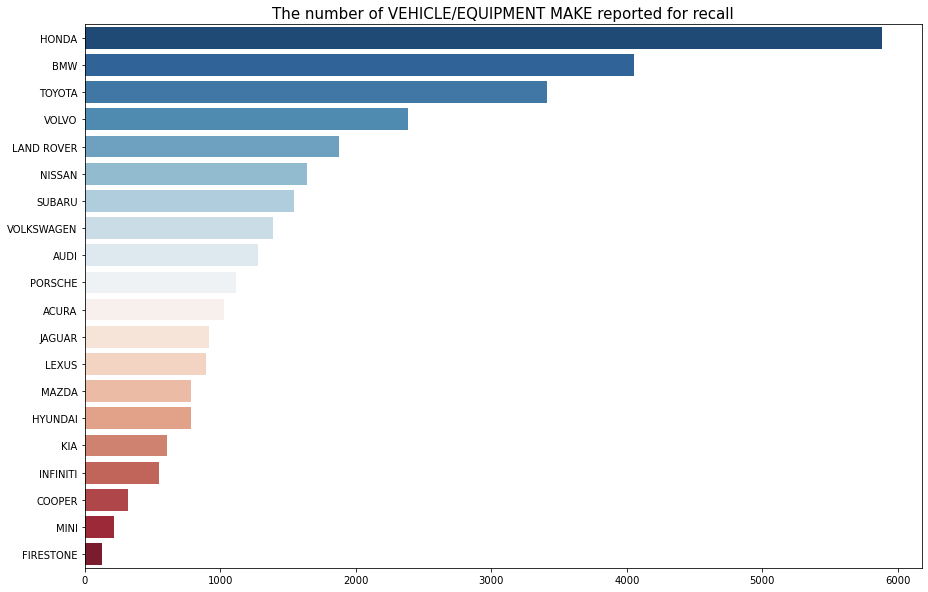

In [8]:
# let's see the trends for VEHICLE/EQUIPMENT MAKE
f, ax = plt.subplots(figsize=(15, 10))

# in the following brackets, we want the value_counts() of the VEHICLE/EQUIPMENT MAKE
x = pd.DataFrame(df.MAKETXT.value_counts().head(20))

# get the VEHICLE/EQUIPMENT MAKE names by calling list() on the x.index
names = list(x.index)

# get the values by plugging x.MAKETXT into the list() function
values = list(x.MAKETXT)

# show the plot 
sns.barplot(x=values, y=names, palette="RdBu_r")
plt.title("The number of VEHICLE/EQUIPMENT MAKE reported for recall", fontsize = 15)
plt.show()


<div class="span5 alert alert-warning">
<span style="color:black">
This plot shows the number of times the manufacturers reported for recall. However, it is not grouped by unique campaign numbers, which will be plotted in the next steps. 
    
But first, let's see the the manufacturers name according to NHTSA CAMPAIGN NUMBER in sorted.
    </div>

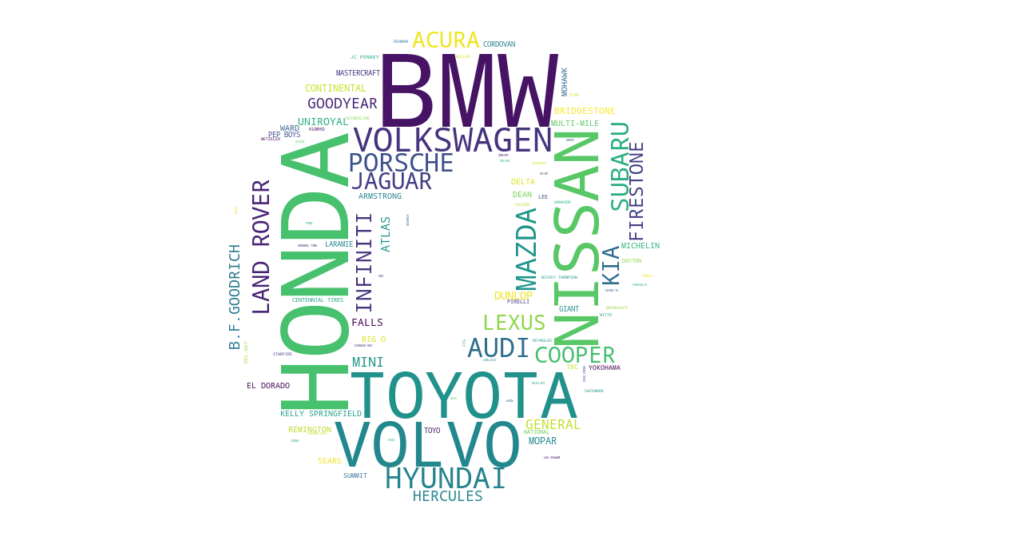

In [9]:
from PIL import Image
tire = np.array(Image.open('tire2.png'))
Mnfname_freq = df.groupby('MAKETXT')['CAMPNO'].nunique().sort_values(ascending=False)

wordcloud = WordCloud(width=1600, height=800, collocations=False, background_color='white',
                max_words=200, mask=tire).generate_from_frequencies(Mnfname_freq)

plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="span5 alert alert-warning">
<span style="color:black">

According to the above graph, BMW, HONDA, TOYOTA, NISSAN and VOLVO have the highest recall number. We will examine this specifically in the next steps.<span></div>

<div class="span5 alert alert-warning">
<span style="color:black">
After seperating the related manufacturers, we want to learn the cause of 
recall campaigns. To do that, we will use CONSEQUENCE SUMMARY feature since we can get the text 
information from it. Then we will vizualize the words according to used frequency.<span>
    </div>

In [10]:
# make a wordcloud for CONSEQUENCE SUMMARY
# but, there are very few NaN values, so remove such rows as it would not affect the Word Cloud to a 
#larger extent

df = df[df.CONEQUENCE_DEFECT .notna()]

# check the NaN values
df.CONEQUENCE_DEFECT .isna().sum()

0

In [11]:
# check for one CONSEQUENCE SUMMARY example
conseq_examp = df.CONEQUENCE_DEFECT.iloc[7]
print(conseq_examp)

IF THIS CONDITION OCCURS, THE DRIVER CAN LOSE STEERING CONTROL, POSSIBLY RESULTING IN A VEHICLE CRASH.


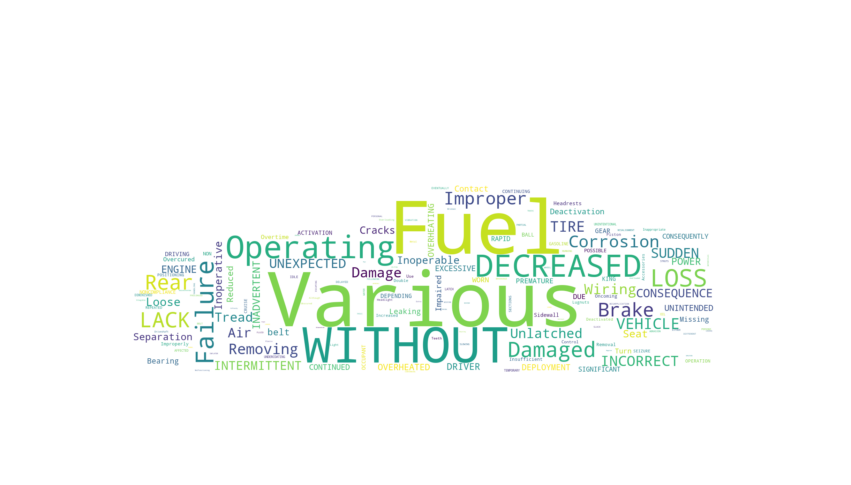

In [12]:
# let's see the wordcloud for CONSEQUENCE SUMMARY 
# first, add the data into text variable
car = np.array(Image.open('car.jpeg'))
text = " ".join(i.split()[0] for i in df.CONEQUENCE_DEFECT)

# create word_cloud with text as argument 
wordcloud = WordCloud(width = 600, height = 300, collocations=False, background_color='white',
                     mask=car).generate(text)

# display the generated wordcloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="span5 alert alert-warning">
<span style="color:black">
    In general some of the most common types of tire defects include: <span>

*  Manufacturing defect


* Tread separation


* Tire lacks specified components


* Retread failure


* Tire not suitable for the type of vehicle


* Tread and steel belt separation


* Incorrect puncture repair


* Tire is damaged during the mounting process


* Tire that appears fine but is old


<span style="color:black">According to the wordcloud, there are a lot of reasons. We want to dig this reason by using the DEFECT SUMMARY.<span>
    </div>

In [13]:
# make a wordcloud for DEFECT SUMMARY
# but, there are very few NaN values, so remove such rows as it would not affect the Word Cloud to a 
#larger extent

df = df[df.DESC_DEFECT .notna()]

# check the NaN values
df.DESC_DEFECT.isna().sum()

0

In [14]:
# check for one DEFECT SUMMARY example
defct_exmp = df.DESC_DEFECT.iloc[7]
print(defct_exmp)

ON SOME HEAVY DUTY CLASS 8 VEHICLES EQUIPPED WITH ARVINMERITOR AXLE ASSEMBLIES WHICH MAY HAVE BEEN MANUFACTURED WITH TRW  MODEL 20EDL BALL SOCKETS, THE TIE ROD BALL-SOCKET BEARINGS HAVE A BELOW SPECIFICATION CASE DEPTH AND/OR HARDNESS WHICH CAN LEAD TO PREMATURE WEAR OUT OF THE SOCKET IN SOME APPLICATIONS.


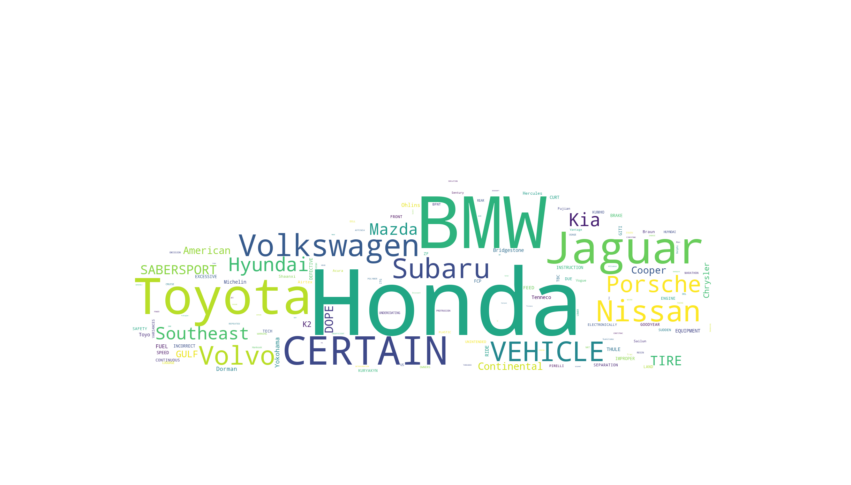

In [15]:
# let's see the wordcloud for DEFECT SUMMARY 
# first, add the data into text variable
text = " ".join(i.split()[0] for i in df.DESC_DEFECT)

# create word_cloud with text as argument 
wordcloud = WordCloud(width = 600, height = 300, collocations=False, background_color='white',
                     mask=car).generate(text)

# display the generated wordcloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="span5 alert alert-warning">
<span style="color:black">
    What we see from the wordcloud, is the proof that: HONDA, BMW and TOYOTA have the highest report rate according to the defect summary. 

<span style="color:black">To make sure, we will use NHTSA CAMPAIGN NUMBER and MANUFACTURERS OF RECALLED VEHICLES/PRODUCTS to see it clearly.<span>
    </div>

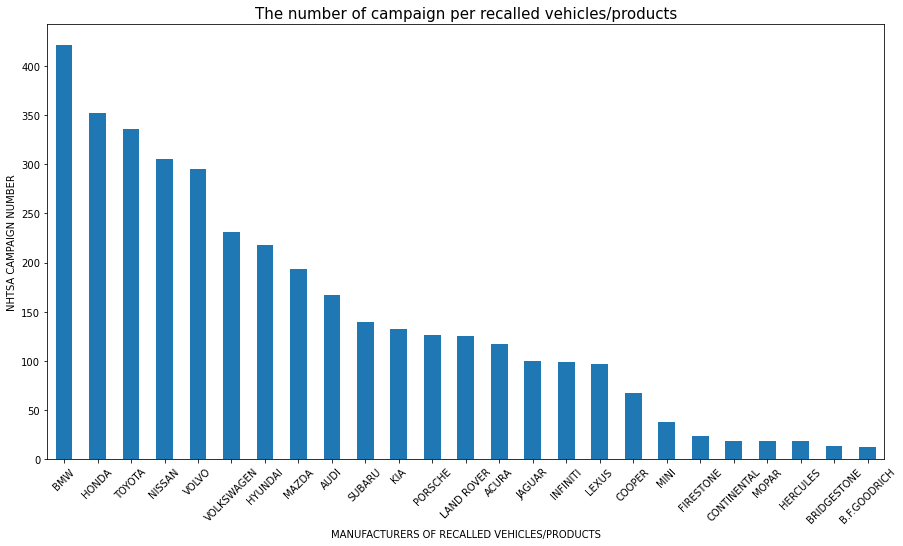

In [16]:
# check for the NHTSA CAMPAIGN NUMBER for the MANUFACTURERS OF RECALLED VEHICLES/PRODUCTS
camp_vehc_recal = df.groupby(['MAKETXT'])['CAMPNO'].nunique().sort_values(ascending=False)
camp_vehc_recal.head(25).plot(kind="bar", figsize=(15, 8))
plt.xlabel("MANUFACTURERS OF RECALLED VEHICLES/PRODUCTS", fontsize = 10)
plt.ylabel("NHTSA CAMPAIGN NUMBER", fontsize = 10)
plt.title("The number of campaign per recalled vehicles/products", fontsize = 15)
plt.xticks(rotation=45)
plt.show()
plt.close()


<div class="span5 alert alert-warning">
<span style="color:black">We can see from the above graph that: NHTSA CAMPAIGN NUMBER is the highest with the BMW, HONDA and TOYOTA. It means, they have the highest recall campaign rates since 1967. When we checked the DEFECT SUMMARY, these were the ones have highest frequency, too.


    
    
<span style="color:black">Also, we want to see the number of vehicles affected by specific recall campaigns. So, let's see it.<span>
    </div>


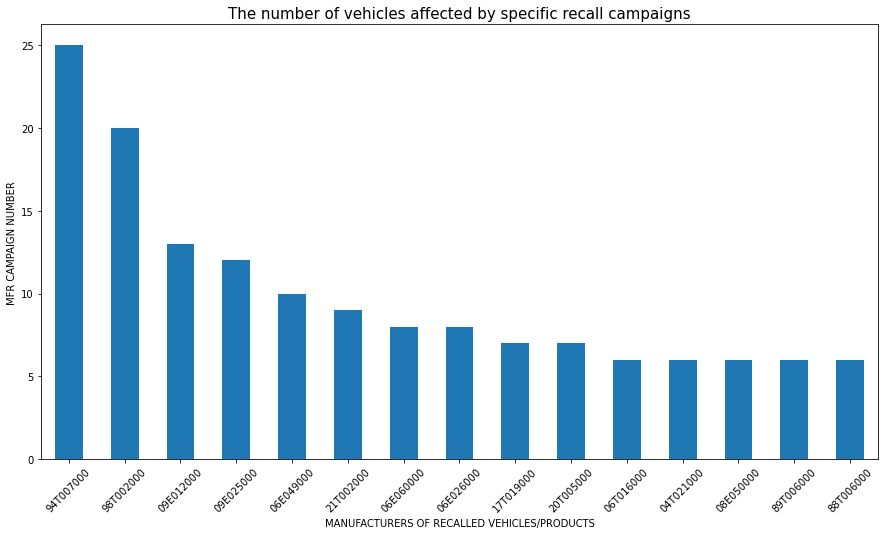

In [17]:
# check for the number of vehicles affected by specific recall campaigns
nmbr_vehc_recal = df.groupby(['CAMPNO'])['MAKETXT'].nunique().sort_values(ascending=False)
nmbr_vehc_recal.head(15).plot(kind="bar", figsize=(15, 8))
plt.xlabel("MANUFACTURERS OF RECALLED VEHICLES/PRODUCTS", fontsize = 10)
plt.ylabel("MFR CAMPAIGN NUMBER", fontsize = 10)
plt.title("The number of vehicles affected by specific recall campaigns", fontsize = 15)
plt.xticks(rotation=45)
plt.show()
plt.close()


<div class="span5 alert alert-warning">
<span style="color:black">In the above graph, we can see how the specific recall campaigns affected to manufacturers. We will dig it. But first, we will check the rates for the REPORT RECEIVED DATE according to VEHICLE/EQUIPMENT MAKE. We will see the fluctuation.<span>
    </div>

In [18]:
# let's convert the RCDATE to date time
df.loc[:,'RCDATE'] = pd.to_datetime(df['RCDATE'].apply(str),format='%Y%m%d')

# set RCDATE as index
df.set_index(df['RCDATE'], inplace=True)

# let's create a column to hold only year (this will be handy for yearly trend analysis)
df.loc[:,'Year'] = df['RCDATE'].dt.year

# let's save the df to file for next step
df.to_pickle('df_cleaned.pkl')

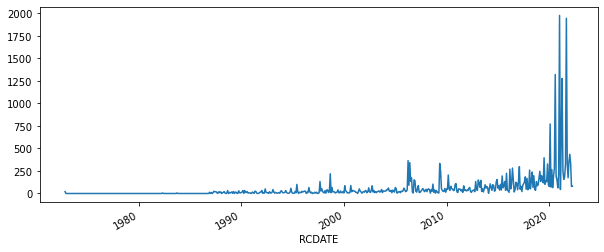

<function matplotlib.pyplot.close(fig=None)>

In [19]:
# total number of recalls per year
fig, ax = plt.subplots(figsize=(10,4))
df['MAKETXT'].resample('m').count().sort_values(ascending=False).plot(axes=ax)
plt.show()
plt.close

In [20]:
# the number of recalls per year for each manufacturer
df.groupby(['Year','MAKETXT'])['CAMPNO'].count()

Year  MAKETXT   
1972  VOLKSWAGEN    21
1982  AUDI           6
1983  AUDI           6
1986  BMW           14
      HONDA          1
                    ..
2022  PORSCHE       10
      TOYOTA        12
      TRI-ACE        2
      VOLKSWAGEN    15
      VOLVO          4
Name: CAMPNO, Length: 1017, dtype: int64

In [21]:
# according to vehicle manufacturer
df.groupby(['MAKETXT','Year'])['CAMPNO'].nunique().sort_values(ascending=False).head(15)

MAKETXT     Year
BMW         2019    40
            2020    36
            2017    29
            2018    25
NISSAN      2021    23
TOYOTA      2015    23
            2016    23
            2018    23
            2014    22
HONDA       2018    21
            2019    21
BMW         2021    21
TOYOTA      2019    21
VOLKSWAGEN  2018    21
HONDA       2015    19
Name: CAMPNO, dtype: int64

In [22]:
# let's see the top manufacturer in terms of overall recall number
MajorRecallMakes = df.groupby('MAKETXT')['CAMPNO'].nunique().\
    sort_values(ascending=False).head(15).index

# filter for the top recall Makes
dfMajor = df.query('MAKETXT in @MajorRecallMakes')

# group
dfMajorByYear = dfMajor.groupby(['MAKETXT','Year'])['CAMPNO'].count().sort_values(ascending=False)
dfMajorByYear.head(15)

MAKETXT     Year
HONDA       2020    3014
LAND ROVER  2021    1452
TOYOTA      2021     806
HONDA       2021     698
BMW         2020     555
JAGUAR      2021     499
PORSCHE     2021     428
TOYOTA      2020     403
BMW         2017     383
HONDA       2006     378
SUBARU      2021     356
BMW         2021     345
HONDA       2019     337
ACURA       2021     327
BMW         2019     311
Name: CAMPNO, dtype: int64

In [23]:
# convert dfMajorByYear to a dataframe >> this helps for easy plotting
dfMajorByYear = pd.DataFrame(dfMajorByYear).reset_index().\
    rename({'CAMPNO': 'Number of Recalls'}, axis=1)
    
dfMajorByYear.head()

,MAKETXT,Year,Number of Recalls
0,HONDA,2020,3014
1,LAND ROVER,2021,1452
2,TOYOTA,2021,806
3,HONDA,2021,698
4,BMW,2020,555


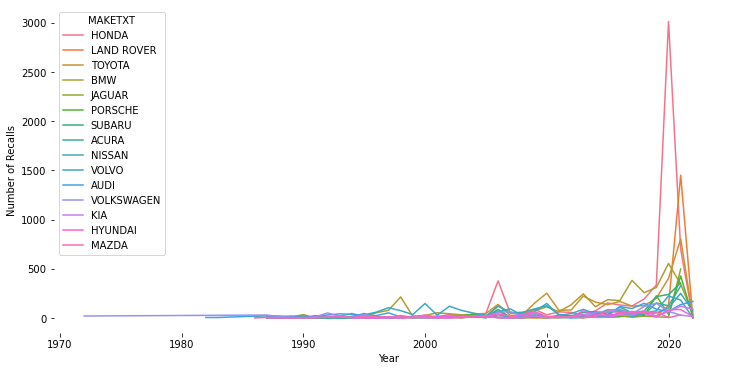

In [24]:
fig, axes = plt.subplots(figsize=(12,6))
axes = sns.lineplot(data=dfMajorByYear, x='Year', y='Number of Recalls', hue='MAKETXT', ax=axes)
sns.despine(bottom=True,left=True)

<div class="span5 alert alert-warning">
<span style="color:black">

In addition to all that, we can specifically look for the consequences after 2019 and compare them with previous ones. <span></div>

C:\Users\kurt_\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


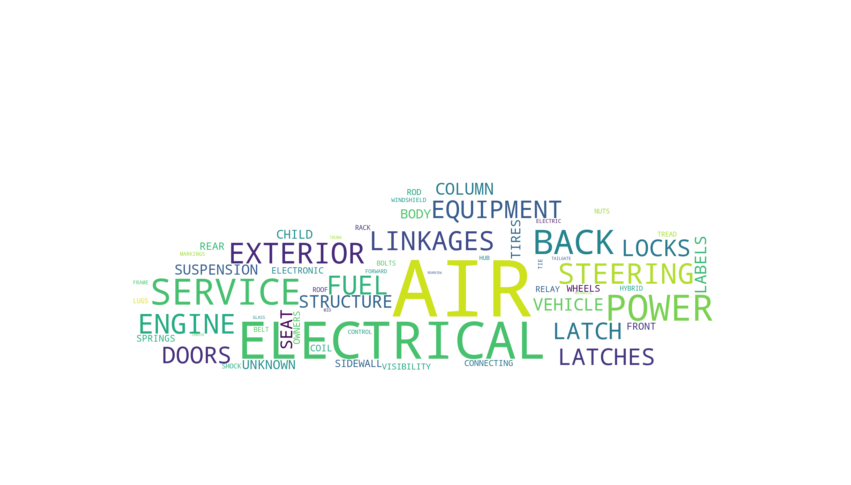

In [25]:
# to examine the COMPONENT DESCRIPTION after 2019, choose a specific time range
df_report_rate = df.loc['2019-01-01':'2020-01-01']

# now, look for the higly used words in the COMPONENT DESCRIPTION for the recall
text = " ".join(i.split()[0] for i in df_report_rate.COMPNAME)

# create word_cloud with text as argument 
wordcloud = WordCloud(width = 600, height = 300, collocations=False, background_color='white', 
                     mask=car).generate(text)

# display the generated wordcloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="span5 alert alert-warning">
<span style="color:black">We can specifically look for the component names. What are the most used words? <span>
    </div>

In [26]:
# convert the COMPONENT DESCRIPTION to list
comp_desc_lines = list()
lines = df['COMPNAME'].values.tolist()

# tokenize the sentences
for line in lines:   
    tokens = word_tokenize(line)
    
    # convert to lower case
    tokens = [m.lower() for m in tokens]
    
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [m.translate(table) for m in tokens]
    
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words    
    stop_words = set(stopwords.words('english'))
    words = [m for m in words if not m in stop_words]
    
    comp_desc_lines.append(words)

    

In [27]:
# create a corpus to fill all words in it
corpus = list()
for i,lst in enumerate(comp_desc_lines):

        row = " ".join(lst)
        corpus.append(row)

In [28]:
# for the highest frequency 
Mjr_comp_desc = collections.Counter(corpus)


In [29]:
# check for the most common sentences
pd.DataFrame(Mjr_comp_desc.most_common(15))

,0,1
0,fuel system gasoline delivery fuel pump,2125
1,air bags frontal passenger side inflator module,1961
2,exterior lighting,1407
3,air bags frontal driver side inflator module,1116
4,back prevention sensing system camera,993
5,seat belts rearother retractor,937
6,seat belts front retractor,931
7,electrical system software,756
8,tires treadbelt,692
9,exterior lighting headlights,689


<div class="span5 alert alert-warning">
<span style="color:black">From the most common component descriptions, we can see there are many reason for a recall campaign. Not only related tire, but different reasons related to vehicles, too.
    
However, if we want to see for the tire, specifically, 'tires treadbelt' is the highest one. <span>